# INFO 5810 Data Analysis and Knowledge Discovery 

Topic : Disaster data mining based on social media texts

Group Team 7

Project Final Submission




Dataset: https://www.kaggle.com/datasets/vstepanenko/disaster-tweets?resource=download

we have choosen above disaster dataset from the twitter social media platform as it has most of all disasters happen in various locations around the united states it have fields like id,keyword,location,text,target where target is 1 will defines the disater incident as real.


Github url: https://github.com/Haryanth/Project-group-7




In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt2

# Importing and reading csv file
df = pd.read_csv('tweet.csv')
                 

# First 5 records 
print("The first five records are ")
df.head(5)
print("The number of rows and columns are ",len(df.axes[0]),'and',len(df.axes[1]))

The first five records are 
The number of rows and columns are  11370 and 5


Data Cleaning:
 1. Analysis on empty cells
    1. Finding number of empty cells present in the data set.
    2. Deciding whether to replace the data with mean, mode, median etc or to remove the empty cells.
 2. Removing Duplicates if present in the data set.

In [58]:
# Analysis by removing empty cells

new_df = df.dropna()
print("The number of rows and columns are ",len(new_df.axes[0]),'and',len(new_df.axes[1]))

The number of rows and columns are  7952 and 5


In [59]:
# As there are nearly 4k records were removed, it is good to replace those empty values 
# Finding number of missing values present in each column 

print(' The number of missing values in each column are ')
print(df.isnull().sum())

 The number of missing values in each column are 
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


In [69]:
# From above analysis it is evident that the location column only has missing values
# Finding different values in location column and their counts

print(df.location.value_counts())

United States              96
Australia                  83
London, England            81
UK                         77
India                      74
                           ..
Great State of Texas        1
Karatina, Kenya             1
The internet or the gym     1
Reston, VA                  1
auroraborealis              1
Name: location, Length: 4504, dtype: int64


In [70]:
# Number of Unique values in location column

n = len(pd.unique(df['location']))  
print("No.of.unique values :", n)

No.of.unique values : 4504


In [71]:
# From the above trend, as location are nominal type of values and there are 4505 unique values in it.
# The count of mode is 96 which is way small when compared to 8k records.
# It is best to remove those records

# Removing missing records
df.dropna(inplace = True)
print("The number of rows and columns are ",len(df.axes[0]),'and',len(df.axes[1]))
print("Missing values in each column are ")
print(df.isnull().sum())

The number of rows and columns are  7952 and 5
Missing values in each column are 
id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [72]:
# Different columns and their data types

print('Columns and their data types are ')
print(df.info())

Columns and their data types are 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7952 entries, 2 to 11368
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7952 non-null   int64 
 1   keyword   7952 non-null   object
 2   location  7952 non-null   object
 3   text      7952 non-null   object
 4   target    7952 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 372.8+ KB
None


In [73]:
# Removing duplicates

df.drop_duplicates(inplace = True)

In [74]:
print("The number of rows and columns are ",len(df.axes[0]),'and',len(df.axes[1]))

The number of rows and columns are  7952 and 5


In [75]:
# From above it is evident that there are no duplicates in the data.

In [76]:
df.to_csv('./disasters_cleaned.csv', index=False)

In [77]:
df

,id,keyword,location,text,target
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1
...,...,...,...,...,...
11362,11362,wrecked,feuille d'érable,Stell wrecked ako palagi sayo. Haha. #ALABTopS...,0
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0


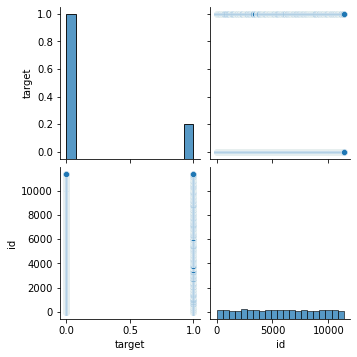

In [78]:
sns.pairplot(df[['target','location','keyword','id']]);

In [79]:
disaster_types = df['keyword'].unique()
print("Types of Disasters reported:\n\n", 'location')
print("Occurrences:\n\n",df['keyword'].value_counts())

Types of Disasters reported:

 location
Occurrences:

 flattened       71
thunderstorm    70
collision       66
engulfed        66
stretcher       64
                ..
exploded        11
siren            7
deluged          6
rainstorm        6
tsunami          5
Name: keyword, Length: 219, dtype: int64


In [80]:
df

,id,keyword,location,text,target
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1
...,...,...,...,...,...
11362,11362,wrecked,feuille d'érable,Stell wrecked ako palagi sayo. Haha. #ALABTopS...,0
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0


C:\Users\akula\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


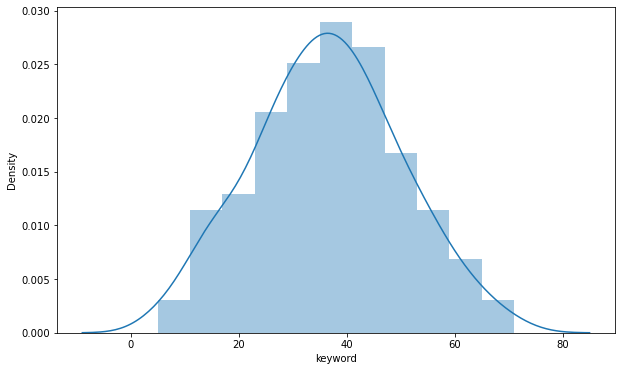

In [81]:
plt2.pyplot.figure(figsize=(10,6))
sns.distplot(df['keyword'].value_counts());

In [82]:
p = df[['keyword', 'location']]
p.groupby(['location'])
# p.reset_index(inplace=False)
# p=p.sort_values(by='keyword',ascending=False).head(10)
p_count = (p.groupby(['keyword']).count())
p_count

,location
keyword,
ablaze,17
accident,27
aftershock,34
airplane%20accident,54
ambulance,26
...,...
wounded,26
wounds,33
wreck,42


lets have a look at the frequency of locations a disaster occurred in the country.

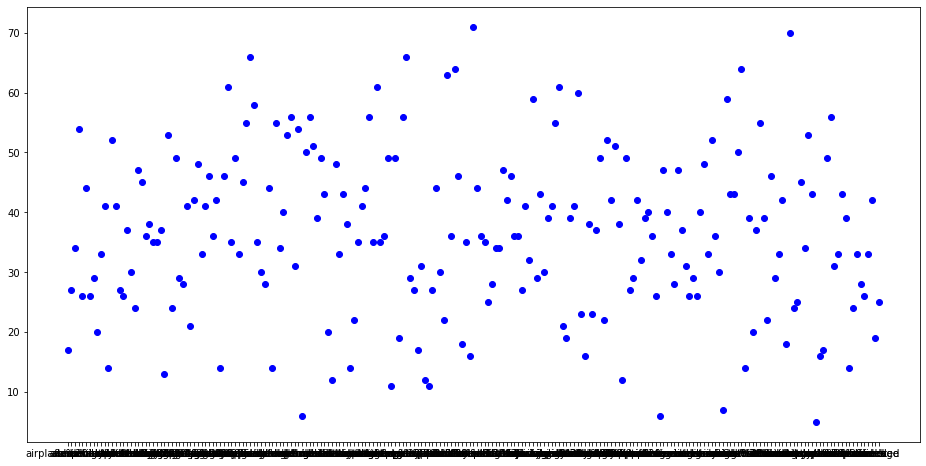

In [83]:
plt2.pyplot.figure(figsize=(16,8))
plt.scatter(p_count.index, p_count['location'], c='blue')
plt.show()

In [84]:
print("Texas mostly faces:\n")
df[['location','keyword']].groupby('location').max().loc['TX']

Texas mostly faces:



keyword    electrocute
Name: TX, dtype: object

In [85]:
# Description of Data

df.describe()

,id,target
count,7952.000000,7952.000000
mean,5679.721705,0.192530
std,3260.075795,0.394312
min,2.000000,0.000000
25%,2854.750000,0.000000
50%,5674.500000,0.000000
75%,8507.500000,0.000000
max,11368.000000,1.000000


<AxesSubplot:xlabel='keyword', ylabel='location'>

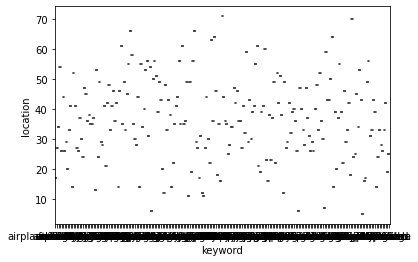

In [86]:
# Detecting outliners
sns.boxplot(x=p_count.index, y=p_count['location'])

<AxesSubplot:xlabel='id'>

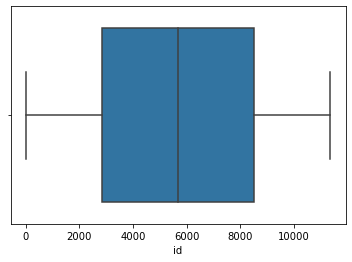

In [87]:
sns.boxplot(x=df['id'])

In [89]:
#Logistic Regression Model Buiding 

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

#X = df.drop('target',axis=1)
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)
print(X.shape)


(7952,)


In [90]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5327,) (2625,) (5327,) (2625,)


In [91]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
# Porter stemmer
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
# Snowball stemmer
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer('english')
# Wordnet lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


#Using count vectors
vectorizer = CountVectorizer(min_df=5)
vectors = vectorizer.fit_transform(df['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\akula\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0, 0.5, 'The Second Principal Component')

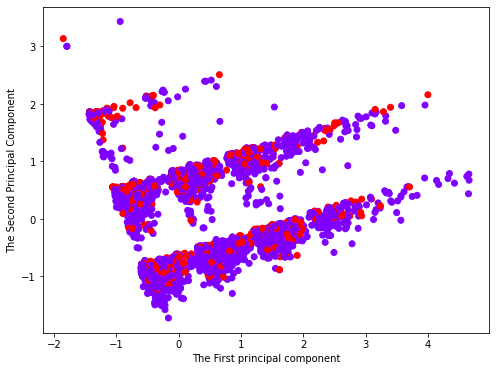

In [92]:
from sklearn.decomposition import PCA

#Reducing dimensionality of large dataset 

pcanalysis = PCA(n_components=2)
x_pcanalysis = pcanalysis.fit_transform(vectors.todense())
plt.figure(figsize=(8,6))
plt.scatter(x_pcanalysis[:,0],x_pcanalysis[:,1],c=df['target'],cmap='rainbow')
plt.xlabel('The First principal component')
plt.ylabel('The Second Principal Component')

In [93]:
#Using TF IDF 
#Normalizing the Data 

TFIDF = TfidfVectorizer(min_df=5)
tfidf_vectors = TFIDF.fit_transform(df['text'])

C:\Users\akula\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0, 0.5, 'The Second Principal Component')

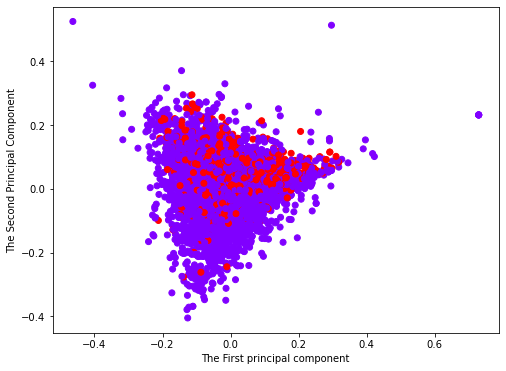

In [94]:
# Applying PCA technique to TF IDF vectors 

tfidf_pca = PCA(n_components=2)
x_pca = tfidf_pca.fit_transform(tfidf_vectors.todense())
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['target'],cmap='rainbow')
plt.xlabel('The First principal component')
plt.ylabel('The Second Principal Component')

In [95]:
def split(text):
    return text.split()

def porter(text):
    return [porter.stem(word) for word in text.split()]

def snowball(text):
    return [snowball.stem(word) for word in text.split()]

def wordnet_lemmatizer(text):
    return [lemmatizer.lemmatize(word) for word in text.split()]

TFIDF = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

In [96]:
param_grid = [
    {
        'vect__ngram_range': [(1, 2)],
        'vect__stop_words': [stop, None],
        'vect__tokenizer': [split, porter, snowball, wordnet_lemmatizer],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [1.0, 10.0, 100.0]        
    },
    {
        'vect__ngram_range': [(1, 2)],
        'vect__stop_words': [stop, None],
        'vect__tokenizer': [split, porter, snowball, wordnet_lemmatizer],
        'vect__use_idf': [False],
        'vect__norm': [None],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [1.0, 10.0, 100.0]
    }
]

pipeline_tfidf = Pipeline([('vect', TFIDF),
                     ('clf', LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

#Using the grid search
grid_tfidf = GridSearchCV(pipeline_tfidf, param_grid, scoring='accuracy',
                           cv=5, verbose=1, n_jobs=-1)

In [97]:
nltk.download('wordnet')
X_train.shape
y_train.shape
grid_tfidf.fit(X_train, y_train)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\akula\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akula\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akula\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\akula\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\akula\anac

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(C=0.1, penalty='l1',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 2)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "yo...
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her', 'hers',
      

In [98]:
grid_tfidf.best_params_

{'clf__C': 100.0,
 'clf__penalty': 'l2',
 'vect__ngram_range': (1, 2),
 'vect__stop_words': None,
 'vect__tokenizer': <function __main__.split(text)>}

In [99]:
grid_tfidf.best_score_

0.8837992054893464

In [100]:
# Accuracy of Model
estimator = grid_tfidf.best_estimator_
estimator.score(X_test, y_test)

0.8853333333333333

In [102]:
#Prediction from the built model

print(df['text'].iloc[0])
print('The predicted value is ',estimator.predict([df['text'].iloc[0]]))
print('True target: ', df['target'].iloc[0])

Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI
The predicted value is  [1]
True target:  1
